In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from dff.webdrivers import init_driver
from dff.helpers import join_or_make, get_args, get_fb_id_from_url, get_user_friends_url
from dff.helpers import construct_social_graph, save_photos, save_friends_data
from dff.scrapper import login, make_friends_data, get_page_posts
from dff.scrapper import get_user_about_section_info, get_user_photos, get_friends
from dff.scrapper import make_mutual_friends

In [4]:
conf = get_args('config.yml')

print('init driver')
# TODO: make all args accessible via dict notation
driver = init_driver(conf['driver']['name'], conf['driver']['maximized'], 
    conf['driver']['headless'], conf['driver']['surpress_notifications'])

print('logging to FB account')
logged_in = login(driver, conf['base_url'], conf['auth']['fb_user'],
    conf['auth']['fb_pass'], conf['user_folder'])

if(logged_in):
    #page_url = driver.current_url
    #get_page_posts(driver)
    friends_section_url = get_friends_section_url(driver, conf['base_url'])
    print('Getting friends blocks')
    friends_blocks = get_friends(driver, friends_section_url)

    print('extracting data from friends blocks')
    friends_data = make_friends_data(friends_blocks)
    
    for i, friend_data in enumerate(friends_data):
        if conf['depth'] == 2:
            # extrait les amis des amis
            # a optimiser en verifiant s'ils sont accessible dans la phase
            # mutual friends, car on peut la voir si les amis sont accessibles
            if 'profile.php' in friend_data['url']:
                friend_all_url = friend_data['url'] + '&sk=friends_all'
            else:
                friend_all_url = friend_data['url'] + '/friends_all'
            friend_friends = get_friends(driver, friend_all_url)
            if friend_friends is not None:
                friends_data[i]['friends'] = make_friends_data(friend_friends)
        friends_data[i]['mutual_friends'] = make_mutual_friends(driver, friend_data['url'])

    print('Saving friends data')
    save_friends_data(friends_data, conf['user_folder'])

    print('Download friends photos')
    save_photos(friends_data, join_or_make(conf['user_folder'], 'friends_photos'), 
        suffix='.thumb')

    print('Getting About user info')
    print(get_user_about_section_info(driver, friends_section_url))
    
    photos = get_user_photos(driver)

    print('Getting photos available on photos section')
    save_photos(photos, join_or_make(conf['user_folder'], 'photos'))
    
    print('constructing the social graph of the account')
    friends_graph = construct_social_graph(conf['auth']['fb_user'], friends_data)
    print(nx.info(friends_graph))
    
    plt.figure(3, figsize=(20, 15)) 
    plt.title('Graphe des amis')
    nx.draw(friends_graph, with_labels=True)
else:
    print "Couldn't login"

NameError: global name 'path' is not defined

init driver
logging to FB account
Getting friends blocks
extracting data from friends blocks
Saving friends data
Download friends photos
Getting About user info
Address
benaknoun alger
Algiers, Algeria
Birthday
August 4, 1980
Getting photos available on photos section
constructing the social graph of the account
Name: 
Type: Graph
Number of nodes: 113
Number of edges: 121
Average degree:   2.1416


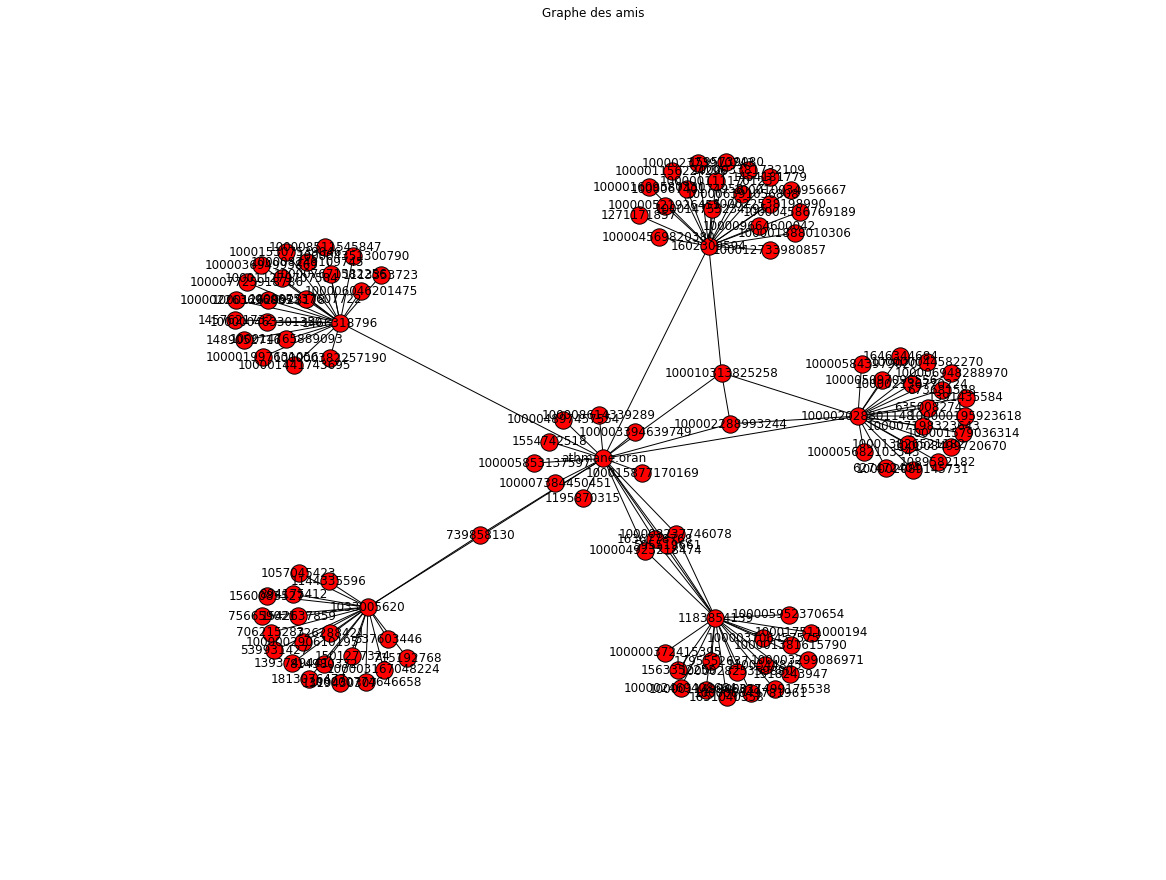

In [6]:
conf = get_args('config.yml')

print('init driver')
# TODO: make all args accessible via dict notation
driver = init_driver(conf['driver']['name'], conf['driver']['maximized'], 
    conf['driver']['headless'], conf['driver']['surpress_notifications'])

print('logging to FB account')
logged_in = login(driver, conf['base_url'], conf['auth']['fb_user'],
    conf['auth']['fb_pass'], conf['user_folder'])

if(logged_in):
    friends_section_url = get_friends_section_url(driver, conf['base_url'])
    print('Getting friends blocks')
    friends_blocks = get_friends(driver, friends_section_url)

    print('extracting data from friends blocks')
    friends_data = make_friends_data(friends_blocks)
    
    for i, friend_data in enumerate(friends_data):
        if conf['depth'] == 2:
            # extrait les amis des amis
            # a optimiser en verifiant s'ils sont accessible dans la phase
            # mutual friends, car on peut la voir si les amis sont accessibles
            if 'profile.php' in friend_data['url']:
                friend_all_url = friend_data['url'] + '&sk=friends_all'
            else:
                friend_all_url = friend_data['url'] + '/friends_all'
            friend_friends = get_friends(driver, friend_all_url)
            if friend_friends is not None:
                friends_data[i]['friends'] = make_friends_data(friend_friends)
        friends_data[i]['mutual_friends'] = make_mutual_friends(driver, friend_data['url'])

    print('Saving friends data')
    save_friends_data(friends_data, conf['user_folder'])

    print('Download friends photos')
    save_photos(friends_data, join_or_make(conf['user_folder'], 'friends_photos'), 
        suffix='.thumb')

    print('Getting About user info')
    print(get_user_about_section_info(driver))
    
    photos = get_user_photos(driver)

    print('Getting photos available on photos section')
    save_photos(photos, join_or_make(conf['user_folder'], 'photos'))
    
    print('constructing the social graph of the account')
    friends_graph = construct_social_graph(conf['auth']['fb_user'], friends_data)
    print(nx.info(friends_graph))
    
    plt.figure(3, figsize=(20, 15)) 
    plt.title('Graphe des amis')
    nx.draw(friends_graph, with_labels=True)
else:
    print "Couldn't login"